# Introduction


A UBC Computer Science research group is collecting data on players in their MineCraft server. This project addresses efforts in finding out who their main participants are. To answer the general question of what kinds of players are most likely to play the most and therefore contribute more data, we came up with a more specific question: 

**Can level of experience, gender, age, or all of the above traits of a player be used to predict their played hours?**

We used the dataset players.csv to find out, which features the number of total hours played by different people. It has a total of seven variables and 196 observations.
The variables in this dataset are:

- experience: the experience level of the player. (Beginner, Amateur, Regular, Pro, and Veteran)
- subscribe: lists whether the player subscribed or not to the newsletter
- hashedEmail: has the player's hashed email
- played_hours: total number of hours played by the player. The lowest value is under an hour. The highest value is about 225 hours.
- name: player's name
- gender: player's gender
- Age: player's age
  
One issue we see in the data is that there are 3 players with Regular experience that hold playing times of around 200-225 hours each. This will mess with the average played hours between the different experience levels, ages, and genders because they deviate from the other Regular players by 175-200 hours. This will make the average hours played by Regular players seem disproportionately large compared to the other levels. 

Another issue may stem from how people were sorted into experience levels. This is a potential issue in the data collection because it is unsure whether the players self-identified their level, which would be inaccurate due to personal biases, or if one person sorted all of them. In addition, some people may have lied about everything completely as a joke. This would affect played hours predictions of the players. Therefore, it is not absolutely known whether the data is completely true or not. 


# Methods and Results

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
players <- players |>
    select(Age, experience, gender, played_hours) |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender))
head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,experience,gender,played_hours
<dbl>,<fct>,<fct>,<dbl>
9,Pro,Male,30.3
17,Veteran,Male,3.8
17,Veteran,Male,0.0
21,Amateur,Female,0.7
21,Regular,Male,0.1
17,Amateur,Female,0.0


Age,experience,gender,played_hours
<dbl>,<fct>,<fct>,<dbl>
20,Amateur,Male,0.0
17,Amateur,Female,0.0
22,Veteran,Male,0.3
17,Amateur,Prefer not to say,0.0
17,Amateur,Male,2.3
NA,Pro,Other,0.2


The first step we took to answer our question was loading and wrangling the data. We first downloaded the dataset from Canvas and we wrangled the data by selecting the variables played_hours, Age, experience, and gender. The other variables in the dataset are not needed to perform the planned analysis. 

We then wanted to find the effects of gender, Age, and level of experience on the number of played_hours. Therefore, we graphed these 3 graphs.

In [3]:
options(repr.plot.width = 10, repr.plot.height = 10)

#gender vs playedtime
playersByGender <- players |>
    group_by(gender) |>
    summarize(mean_played_hours = mean(played_hours))
playersByGender

gender,mean_played_hours
<fct>,<dbl>
Agender,6.25000000
Female,10.63513514
Male,4.12741935
Non-binary,14.88000000
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


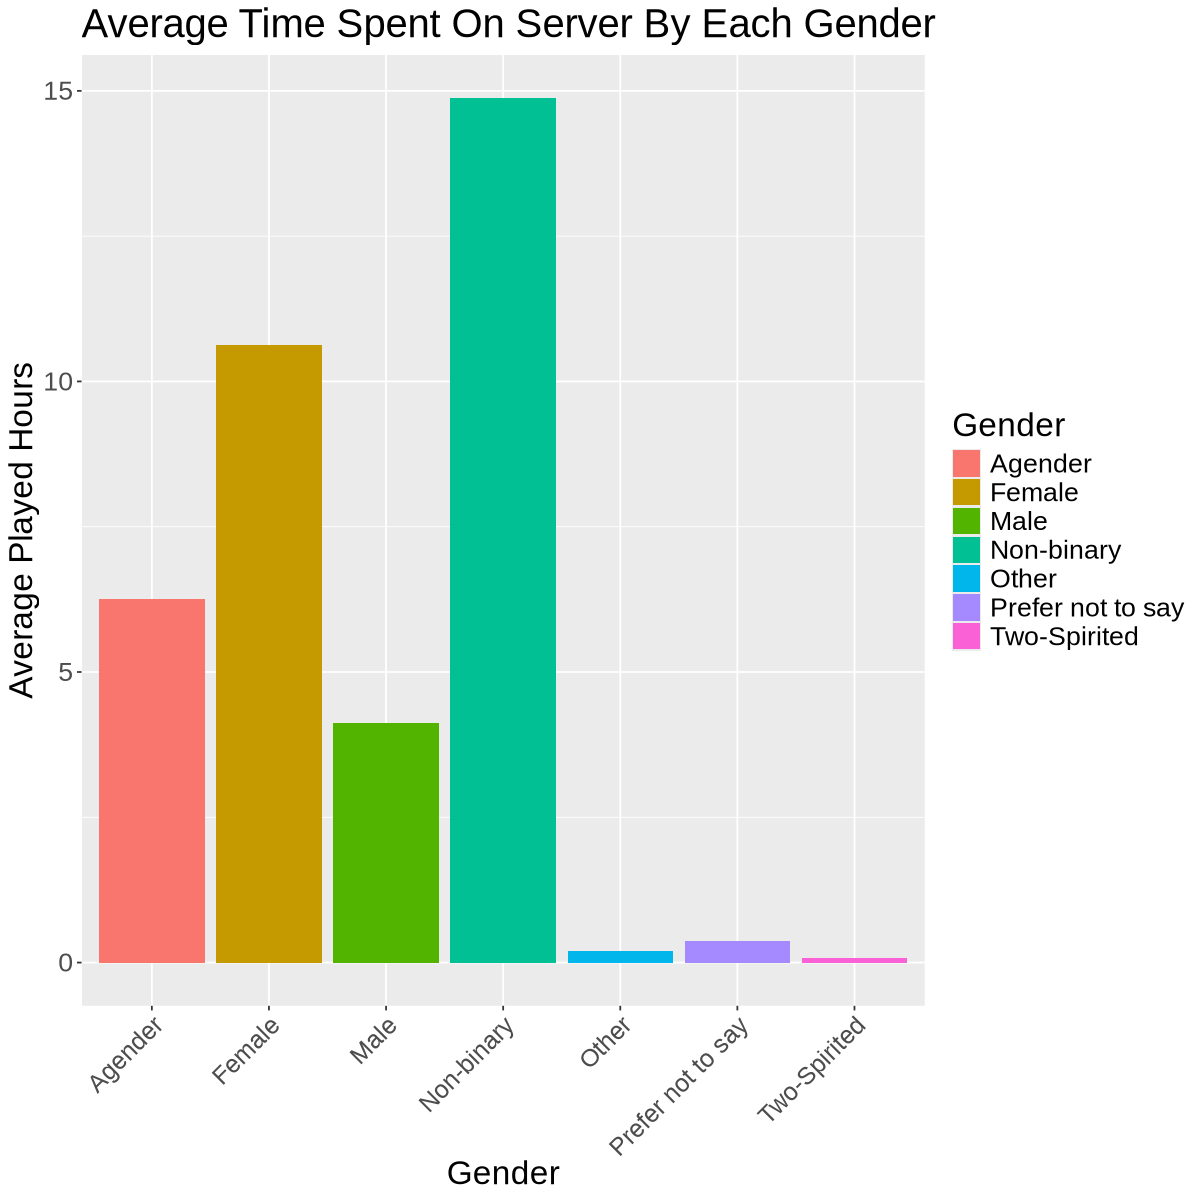

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)

genderVsPlayedHoursBar <- playersByGender |>
    ggplot(aes(x = gender, y = mean_played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(x = "Gender", y = "Average Played Hours", fill = "Gender") +
    ggtitle("Average Time Spent On Server By Each Gender") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 1))
genderVsPlayedHoursBar

Here, those that identify as Non-binary, Female, and Agender have contributed the most data. 

Next, we grouped by experience and made a histogram graph with experience levels on the x axis and played_hours on the y-axis.     

In [5]:
#Experience Vs Played Time
playersByExperience <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours))
playersByExperience

experience,mean_played_hours
<fct>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


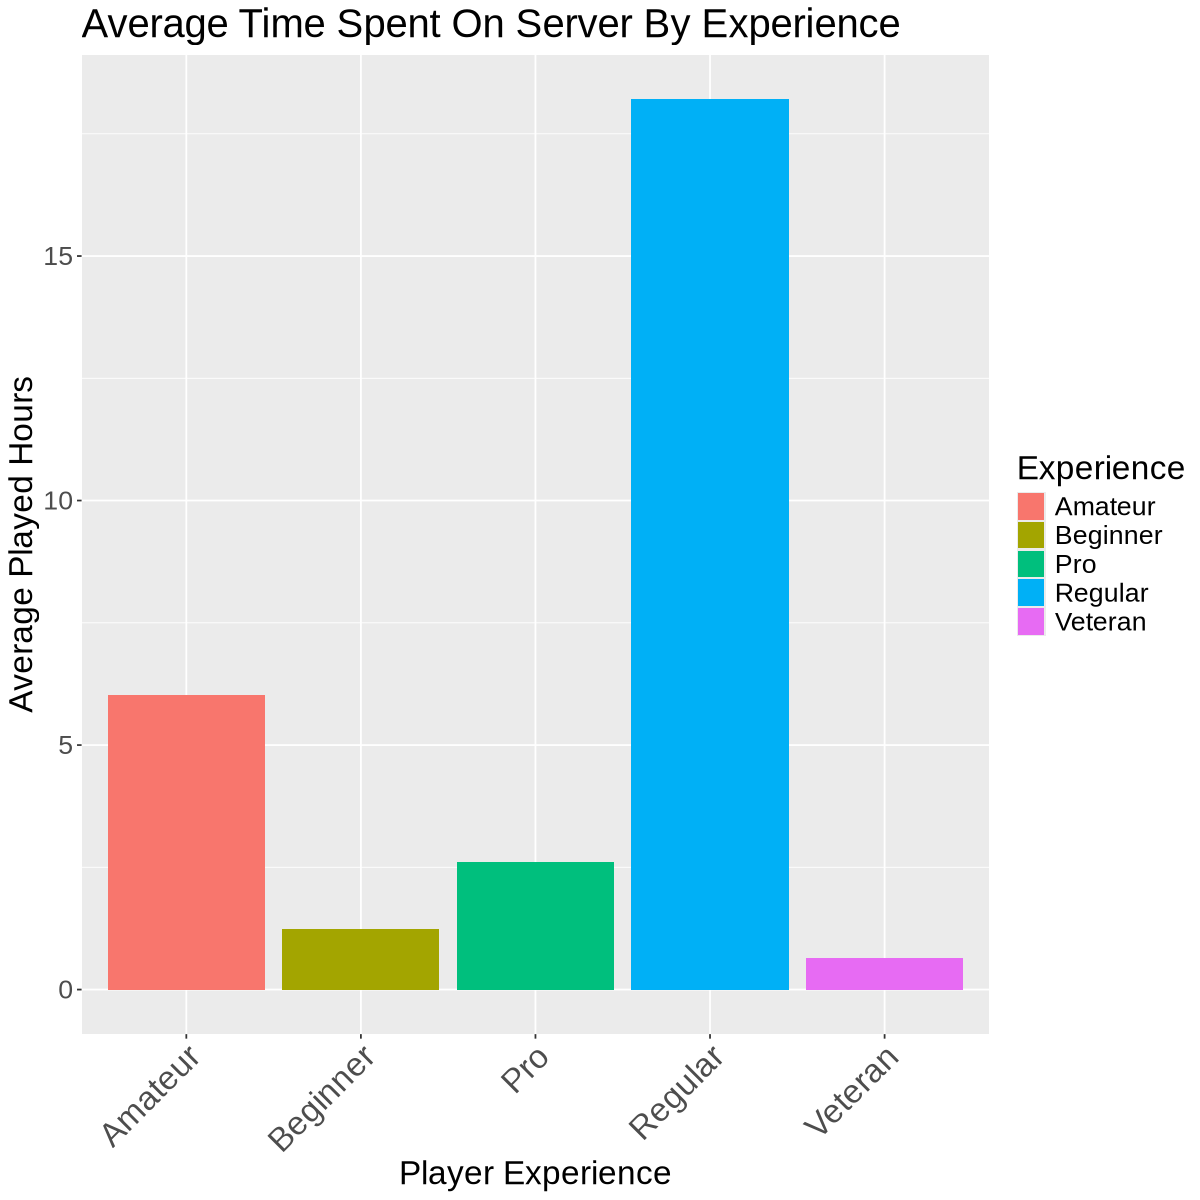

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)

ExperienceVsPlayedHours <- playersByExperience |>
    ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_bar(stat= "identity") +
    labs(x = "Player Experience", y = "Average Played Hours", fill = "Experience") +
    ggtitle("Average Time Spent On Server By Experience") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
ExperienceVsPlayedHours

In this graph, players whose experience level is "Regular" contributed the most data, followed by Amateurs and Pros. 

Finally, we made a histogram of played_hours vs Age. To do this, we wrangled the dataset by grouping by Age. 

In [7]:
playersByAge <- players |>
    group_by(Age) |>
    summarize(mean_played_hours = mean(played_hours)) |>
    mutate(Age = as.factor(Age)) |>
    filter(!is.na(Age))
head(playersByAge)
tail(playersByAge)

Age,mean_played_hours
<fct>,<dbl>
8,0.3
9,30.3
10,3.6
11,2.9
12,0.5
14,8.7


Age,mean_played_hours
<fct>,<dbl>
42,0.0
44,0.1
45,0.1
46,0.0
49,18.5
50,0.0


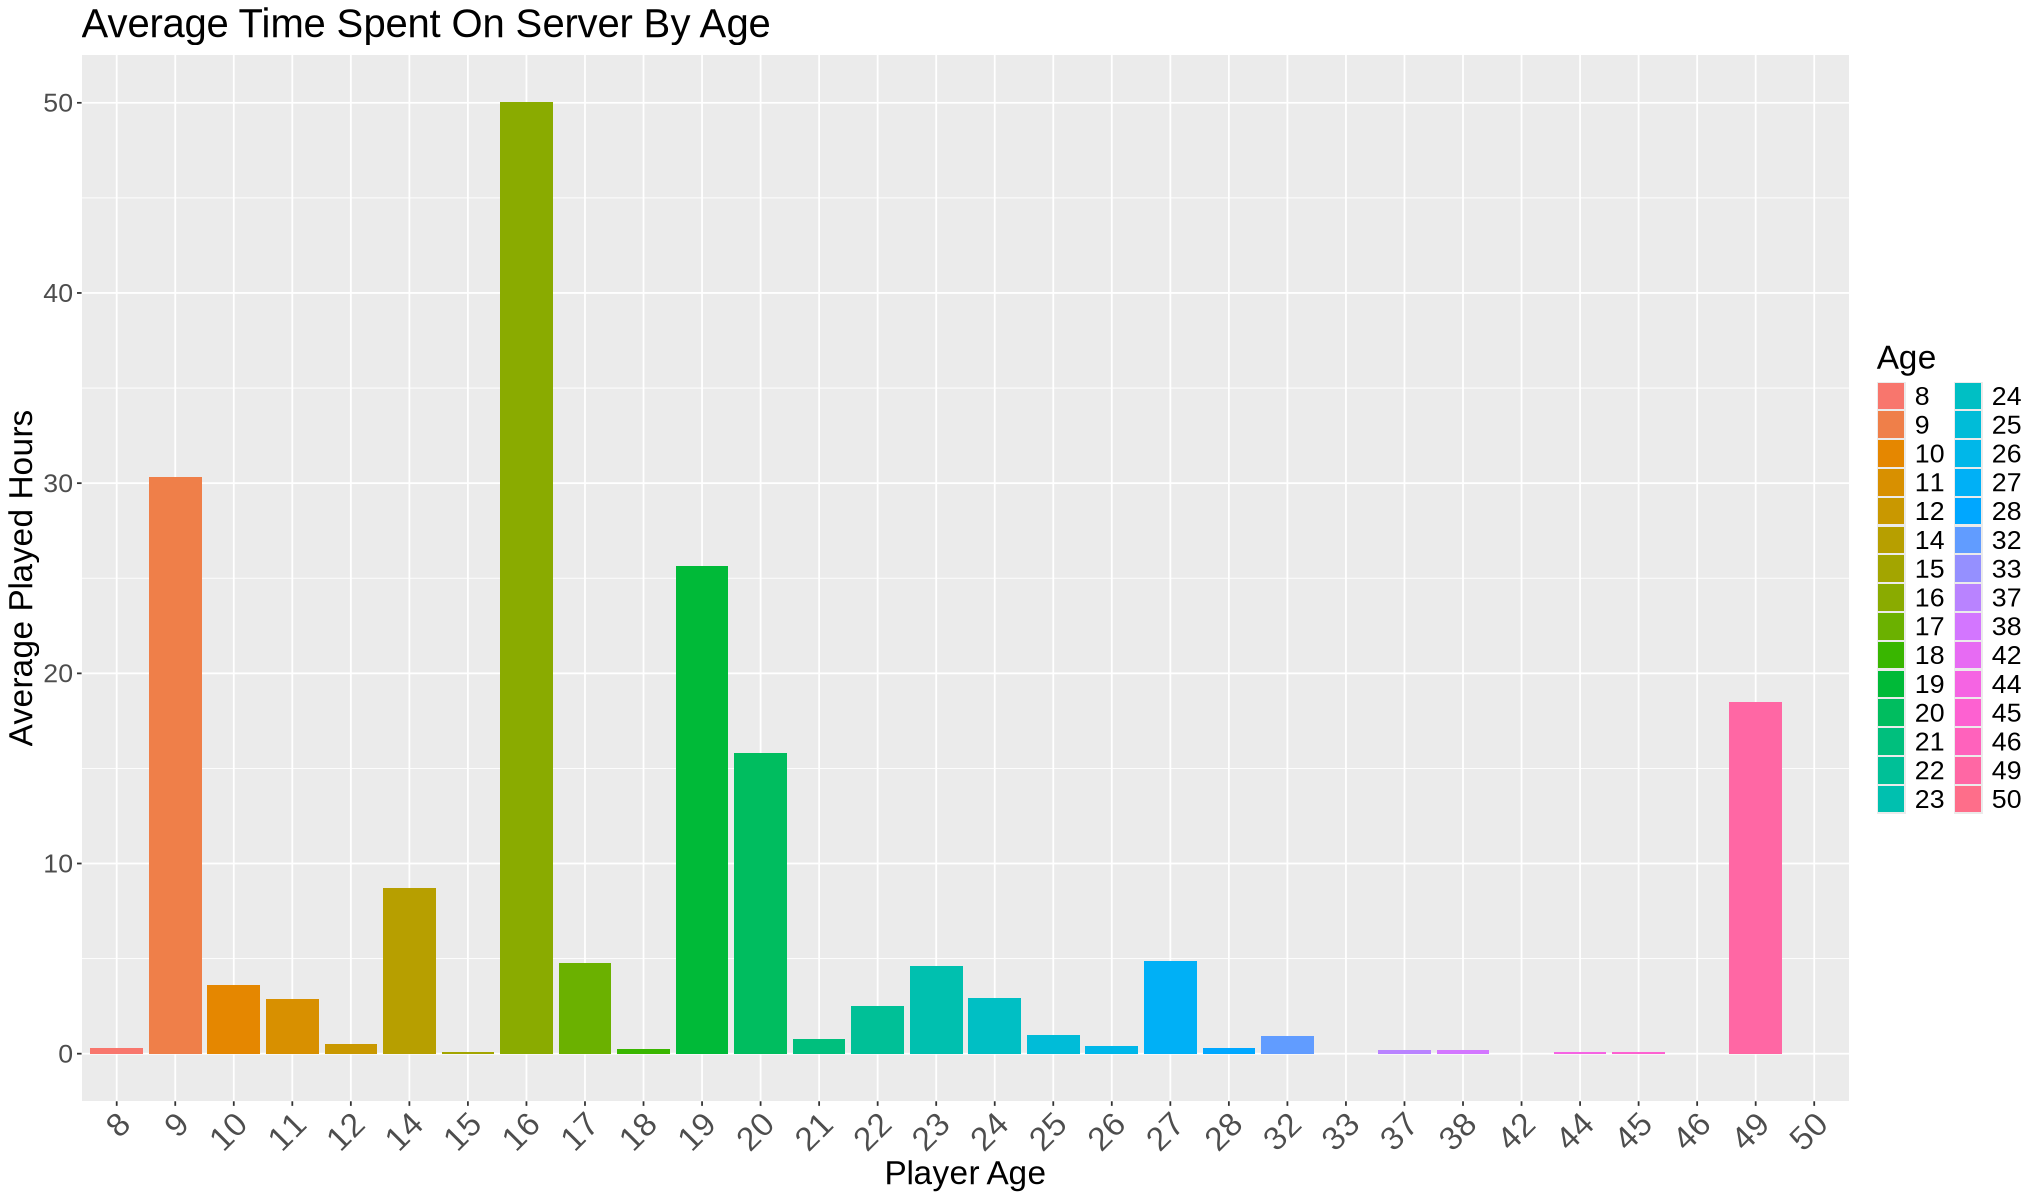

In [8]:
options(repr.plot.width = 17, repr.plot.height = 10)
ageVsPlayedHoursBar <- playersByAge |>
    ggplot(aes(x = Age, y = mean_played_hours, fill = Age)) +
    geom_bar(stat= "identity") +
    labs(x = "Player Age", y = "Average Played Hours", fill = "Age") +
    ggtitle("Average Time Spent On Server By Age") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
ageVsPlayedHoursBar

In this plot, the ages that contributed the most data were those ages 16, 9, 19, 49, 20, 14, 27, 17. Therefore, we included these in the graph below. 

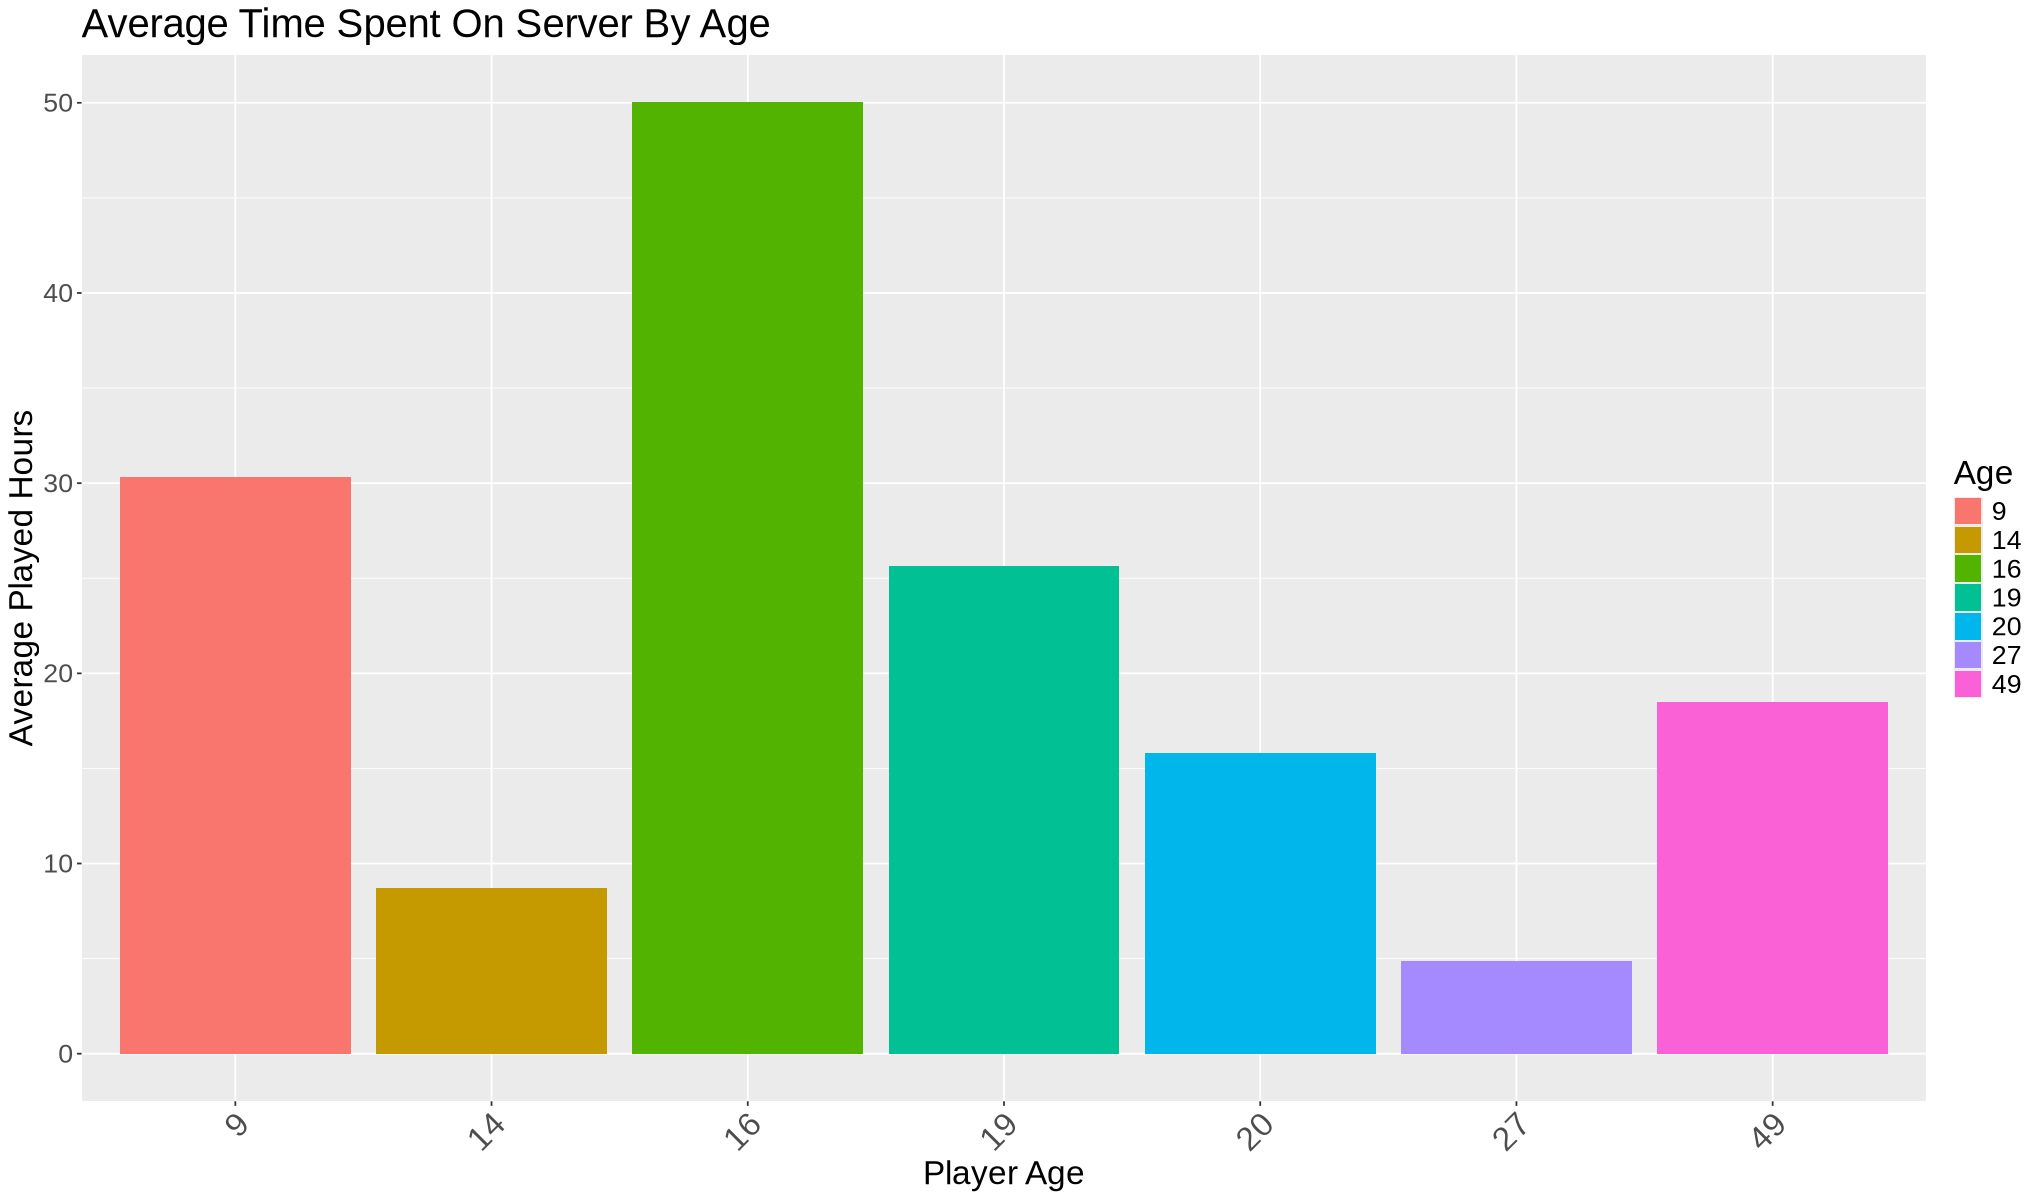

In [9]:
playersByAge <- playersByAge |>
    filter(Age %in% c(9, 14, 16, 19, 20, 27, 49))

ageVsPlayedHoursBar <- playersByAge |>
    ggplot(aes(x = Age, y = mean_played_hours, fill = Age)) +
    geom_bar(stat= "identity") +
    labs(x = "Player Age", y = "Average Played Hours", fill = "Age") +
    ggtitle("Average Time Spent On Server By Age") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
ageVsPlayedHoursBar

In order to visualize what all three variables would look like together, we made a scatter plot with Age on the x-axis, played_hours on the y-axis, different colors of these points correlate to different genders, and different shapes correlate to different levels of experience. 

Since we could see a clear winner for all three of these variables, we decided to choose all three as predictors for the amount of played hours of a player. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


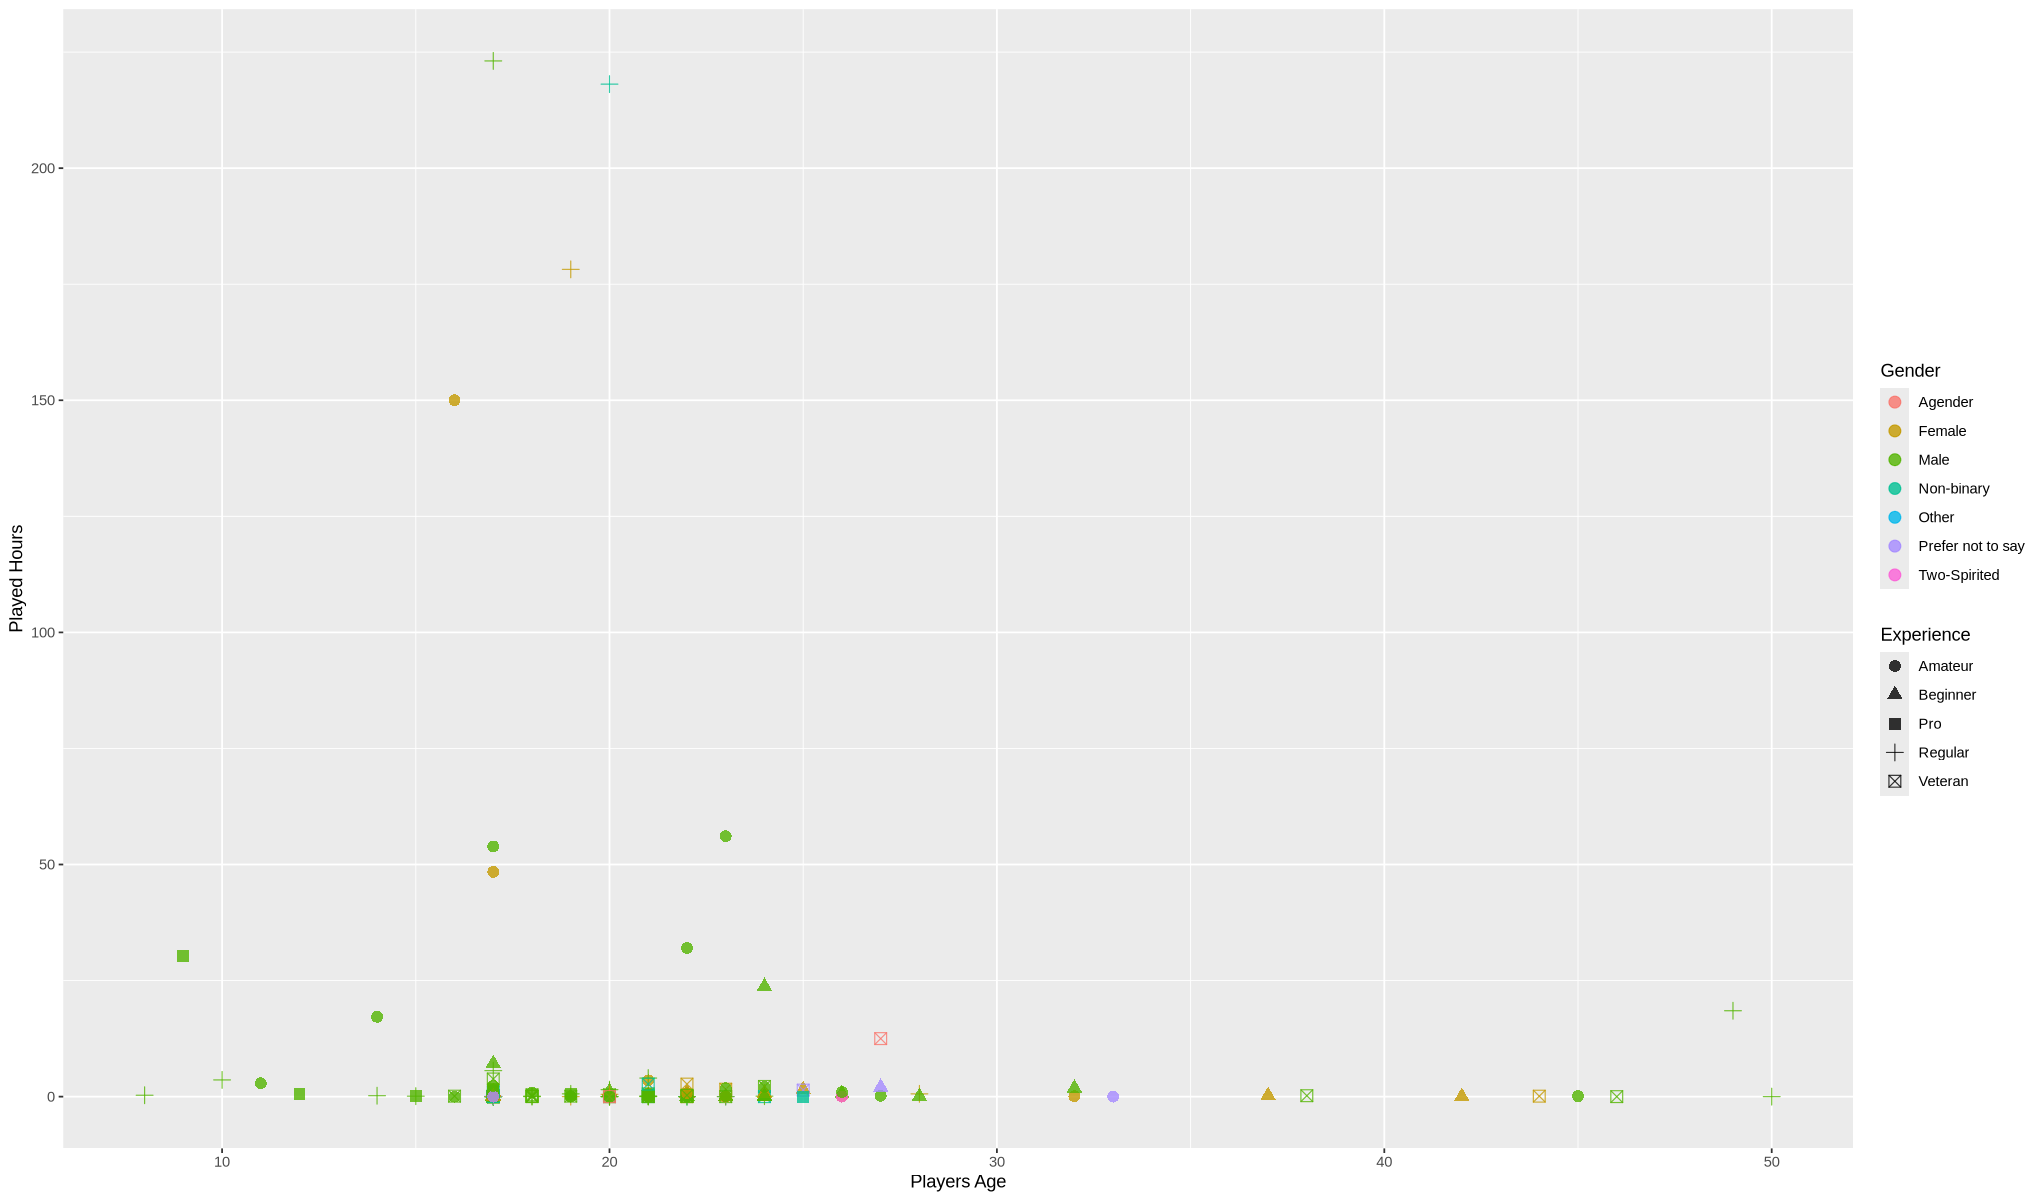

In [10]:
#visualization of all predictors       MAYBE WE DONT NEED THIS
totalScatterPlot <- players|>
    ggplot(aes(x = Age, y = played_hours, shape = experience, color = gender)) +
    geom_point(size = 3, alpha = 0.8) +
    labs(x = "Players Age", y = "Played Hours", color = "Gender", shape = "Experience")
totalScatterPlot

Since the above graph did not help us clearly visualize any trends in the data, we moved onto building a KNN regression model.

We chose KNN regression because we were trying to predict a numerical value and there were not linear or cluster-like trends.

The initial step in trying to use KNN regression was first splitting the dataset into two portions (training set and testing set). We made 80% training data and 20% testing data.

Since our dataset does not include many observations, we wanted to maximize the nubmer of observations that we were training our model on. Therefore, we decided on the 80/20 split.

In [11]:
#split the data each
set.seed(1) #value of the seed does not matter

split <- initial_split(players, prop = 0.8) # used 80% for training data because we dont have that much observatios i.e. 193 rows
trainData <- training(split)
testData <- testing(split)



To use KNN regression, we needed to create a recipe, model, vfold, and workflow from the training data. 

When making the recipe, we used the functions step_novel and step_dummy to prevent any errors in predictions. For example, there are not a lot of Agender and Two Spirited people in the dataset. step_novel ensures that if these are not included in the training data, the model will label these new categories as "novel" when they are encountered in the test data. 

Another problem is that two of our three predictors (gender and experience level) are categorical variables. This is a problem because, for example, R might interpret Male as closer to Female if we respectively assigned them 1 and 2 compared to whichever gender we assigned as 4. However, this is not true because gender is a spectrum, not one-dimensional. The same goes for experience. The function step_dummy takes care of this by turning each gender and level into separate 0/1 columns.


Below are the steps we took to create the KNN Regression Model:


### Step 1: Create Recipe

In [12]:
#build regression model 
playersRecipe <- recipe(played_hours ~ Age + gender + experience, data = trainData) |>
    step_center(Age) |>  #if we dont do this, dummy values are going to have less power
    step_scale(Age) |>
    step_novel(experience, gender) |>
    step_dummy(experience, gender) #[1]


### Step 2: KNN Model

In [13]:
playersSpec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> #we want to choose best k
    set_mode("regression") |>
    set_engine("kknn")

### Step 3: VFold

We used the function vfold to divide data into five sections. In other words, it makes resampling splits in order to perform cross validation of the data.  

In [14]:
playersVfold <- vfold_cv(trainData, v = 5, strata = played_hours) #strata so each fold gets similar played hours distribution

### Step 4: Create a Workflow

In [15]:
playersWorkflow <- workflow() |>
    add_model(playersSpec) |>
    add_recipe(playersRecipe)
playersWorkflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_center()
• step_scale()
• step_novel()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### Step 5: Tune k using cross-val

Next, we tuned k using cross-validation. This meant using the functions tune_grid, collect_metrics, and filter to collect data on the RMSE of each k value. This was plotted using a line-scatter plot, where we found that k should be 73. Knowing which k would have the lowest RMSE, we created a new model with this k value.


In [16]:
gridval <- tibble(neighbors = seq(1, 120, 3))

knn_results <- playersWorkflow |>
    tune_grid(resamples = playersVfold, grid = gridval) |>
    collect_metrics() |>
    filter(.metric == "rmse")
knn_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.68874,3,8.810980,Preprocessor1_Model01
4,rmse,standard,29.98467,3,6.937816,Preprocessor1_Model02
7,rmse,standard,28.16876,3,7.759824,Preprocessor1_Model03
10,rmse,standard,28.47788,3,7.567289,Preprocessor1_Model04
13,rmse,standard,27.91727,3,7.983505,Preprocessor1_Model05
16,rmse,standard,27.57361,3,8.120288,Preprocessor1_Model06
19,rmse,standard,26.56262,3,8.219697,Preprocessor1_Model07
22,rmse,standard,26.70207,3,8.385110,Preprocessor1_Model08
25,rmse,standard,26.69332,3,8.443769,Preprocessor1_Model09


### Step 5.1: Visualize the neighbours and their accuracy

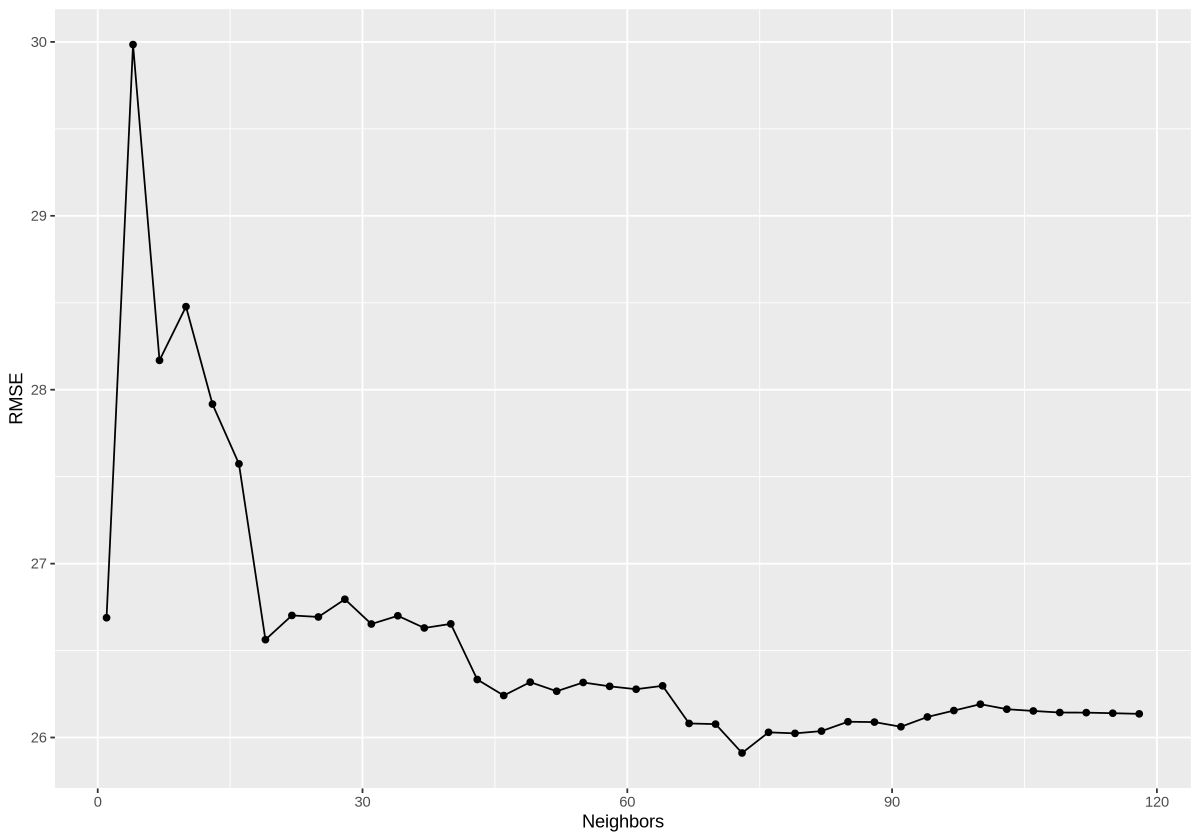

In [17]:
options(repr.plot.width = 10, repr.plot.height = 7)
accuracyOfK <- knn_results |>
    ggplot(aes(x = neighbors , y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "RMSE")
accuracyOfK

### Step 5.2: Find Minimum RMSE Value

In [18]:
players_min_k <- knn_results |> 
    filter(mean == min(mean))
players_min_k

players_k = players_min_k |>
    pull(neighbors)


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
73,rmse,standard,25.91103,3,8.457378,Preprocessor1_Model25


### Step 6:  Create New Model With Best K

In [19]:
playersNewSpec <- nearest_neighbor(weight_func = "rectangular", neighbors = players_k) |>
    set_mode("regression") |>
    set_engine("kknn")

playersNewFit <- workflow() |>
    add_recipe(playersRecipe) |>
    add_model(playersNewSpec) 

### Step 7: Fit Training Data

In [20]:
trainingFit <- playersNewFit |>
    fit(data = trainData)

### Step 8: Predictions on Test Set

In [21]:
playersPrediction <- predict(trainingFit, testData) |>
    bind_cols(testData)
playersPrediction

.pred,Age,experience,gender,played_hours
<dbl>,<dbl>,<fct>,<fct>,<dbl>
5.950685,17,Veteran,Male,0.0
7.215068,21,Amateur,Female,0.7
8.150685,21,Regular,Male,0.1
7.231507,17,Amateur,Female,0.0
2.965753,21,Amateur,Male,0.0
5.773973,17,Amateur,Male,0.1
6.197260,17,Pro,Male,0.0
7.231507,17,Amateur,Female,48.4
8.127397,17,Regular,Male,0.0


### Step 9: Testing Set RMSE


In [22]:
knn_mult_mets <- metrics(playersPrediction, truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")
knn_mult_mets

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,34.25301


The above tibble shows what the model calculated the RMSE on truly unseen data (testing data). We did this to find out how good the model's generalization skills of the data are and we found out that RMSE on vfold was less than RMSE calculated on actual unseen data, suggesting that our model does not generalize well and may lead to overfitting.

### Step 11: Final visualization of the model

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


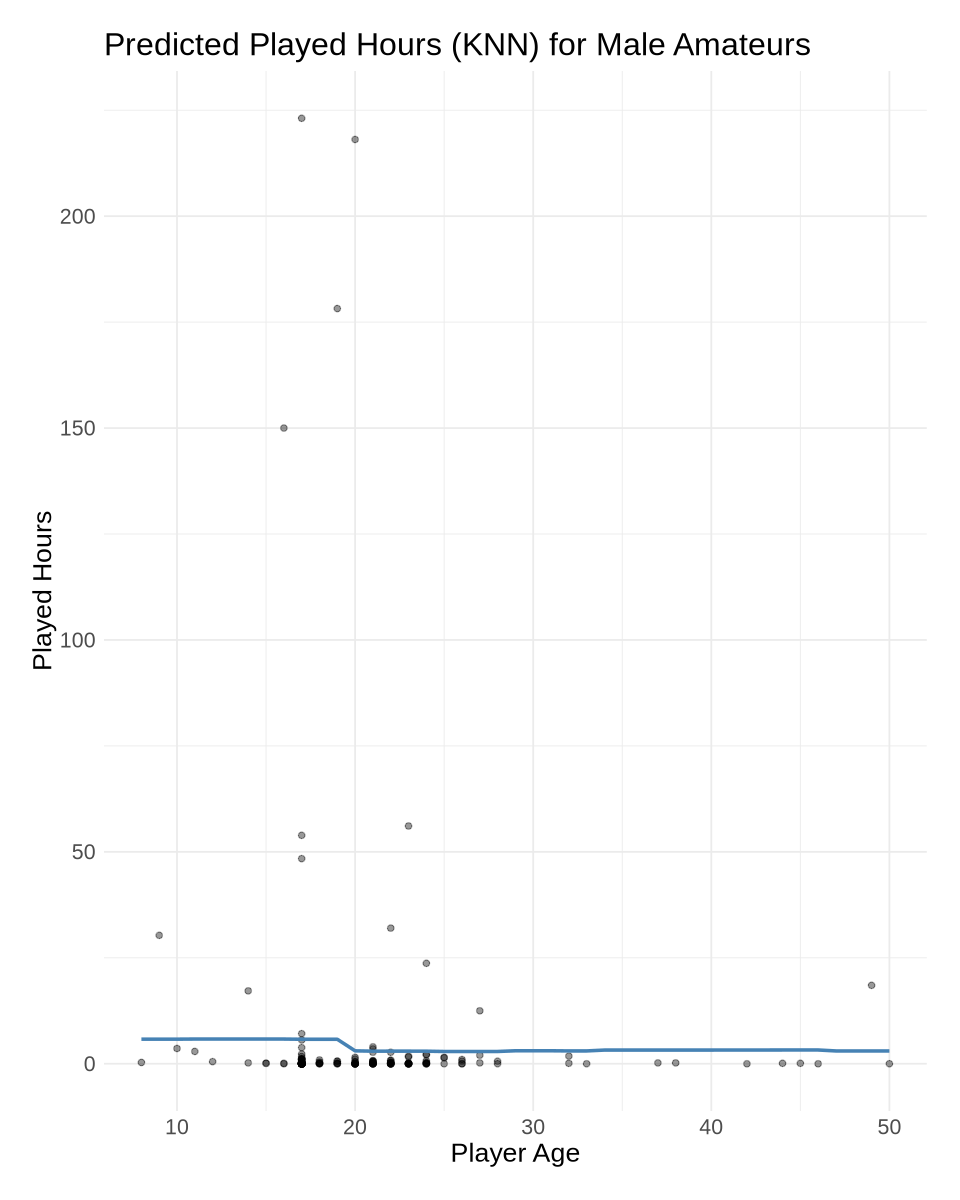

In [23]:
options(repr.plot.width = 8, repr.plot.height = 10)

prediction_grid <- tibble(
  Age = seq(min(players$Age, na.rm = TRUE), max(players$Age, na.rm = TRUE), by = 1),
  gender = "Male",
  experience = "Amateur"
)

# 2. Predict using the fitted model
age_preds <- trainingFit |>
  predict(prediction_grid) |>
  bind_cols(prediction_grid)

# 3. Plot predicted vs actual (on training or full data)
plot_final <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = age_preds, aes(x = Age, y = .pred), color = "steelblue", linewidth = 1) +
  xlab("Player Age") +
  ylab("Played Hours") +
  ggtitle("Predicted Played Hours (KNN) for Male Amateurs") +
  theme_minimal() +
theme(
    text = element_text(size = 16),      
    plot.margin = margin(20, 20, 20, 20))


plot_final